In [1]:
import os
import cv2
import torch
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from models.finalModel import FinalModel2
%load_ext autoreload
%autoreload 2

In [23]:
def run_model(folder, img_name, model):
    img = cv2.imread(os.path.join(folder, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    with torch.no_grad():
        res = model(torch.from_numpy(img).short().permute((2, 0, 1))).numpy()
    q = np.zeros(img.shape).astype(int)
    q[res.astype(bool)] = img[res.astype(bool)].astype(int)
    fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(15, 15))
    axs[0].imshow(img)
    axs[1].imshow(q)
    axs[2].imshow(res)
    return q

In [14]:
model = FinalModel2()

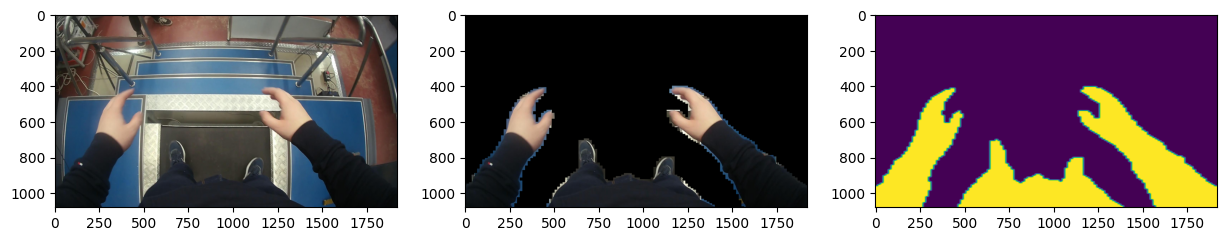

In [24]:
res = run_model(".", "5_X.jpg", model)